In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features,64),
            nn.LeakyReLU(.01),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)
    
class generator(nn.Module):
    def __init__(self, n_dim, io_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(n_dim,64),
            nn.LeakyReLU(.01),
            nn.Linear(64, io_dim),
        )

    def forward(self, x):
        return self.gen(x)

n_dim = 3 #noise dimension.
io_dim = 3 #generator output and disc input dimension.
lr = 3e-4
num_epoch = 10000
#num_exp = 1000
#batch = 100

disc = discriminator(io_dim)
gen = generator(n_dim, io_dim)

opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

fixed = torch.randint(0,2,(1,n_dim))
fixed_noise = fixed.float()

z= np.zeros(num_epoch)
z1= np.zeros(num_epoch)
z2= np.zeros(num_epoch)

data=torch.zeros(20,3)
conc = torch.Tensor([[10,6,3]])
for i in range(20):
    dist = torch.distributions.dirichlet.Dirichlet(conc)
    data[i] = dist.sample()

for ep in range(1):

    for epoch in range(num_epoch):
        #print(epoch)
        for batch in range(20):

            ##Training discriminator
            #conc = torch.Tensor([[10,6,3]])
            #dist = torch.distributions.dirichlet.Dirichlet(conc)
            #data = dist.sample()

            noise = torch.randint(0,2,(1,n_dim))
            noise_f = noise.float()
            fake = gen(noise_f)
            disc_real = disc(data[batch])
            lossD_real = criterion(disc_real, torch.ones_like(disc_real))
            disc_fake = disc(fake)
            lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
            lossD = (lossD_real + lossD_fake) / 2
            disc.zero_grad()
            lossD.backward(retain_graph=True)
            opt_disc.step()


            ##Training generator
            output = disc(fake)
            lossG = criterion(output, torch.ones_like(output))
            gen.zero_grad()
            lossG.backward()
            opt_gen.step()

        generated_samples = gen(noise_f)

        z[epoch] = generated_samples[0,0].item()
        z1[epoch] = generated_samples[0,1].item()
        z2[epoch] = generated_samples[0,2].item()


In [3]:
len(z)

10000

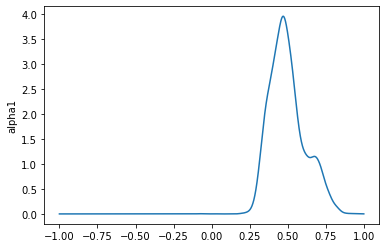

0.47014701470147013

In [4]:
from scipy.stats.kde import gaussian_kde
density = gaussian_kde(z)
xs = np.linspace(-1,1,len(z))
plt.plot(xs,density(xs))
#plt.hist(K1,density=True)
#matplotlib.pyplot.title('marginal distribution of alpha1')
plt.ylabel('alpha1')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

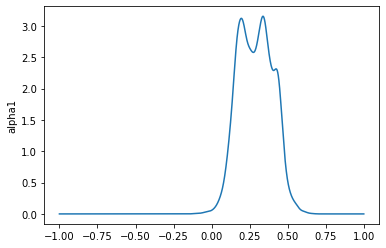

0.33753375337533753

In [5]:
density = gaussian_kde(z1)
xs = np.linspace(-1,1,len(z1))
plt.plot(xs,density(xs))
#plt.hist(K1,density=True)
#matplotlib.pyplot.title('marginal distribution of alpha1')
plt.ylabel('alpha1')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

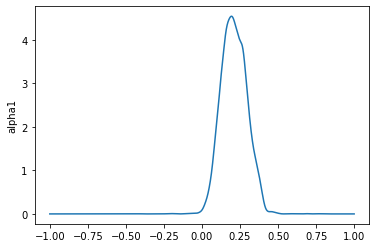

0.19391939193919394

In [6]:
density = gaussian_kde(z2)
xs = np.linspace(-1,1,len(z2))
plt.plot(xs,density(xs))
#plt.hist(K1,density=True)
#matplotlib.pyplot.title('marginal distribution of alpha1')
plt.ylabel('alpha1')
#plt.plot(K1,np.exp(-K3))
plt.show()
#statistics.mode(Kth_1)
a = (density(xs))
i = list(a).index(max(density(xs))) 
i
xs[i]

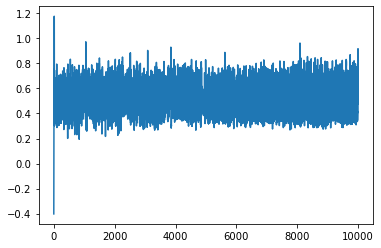

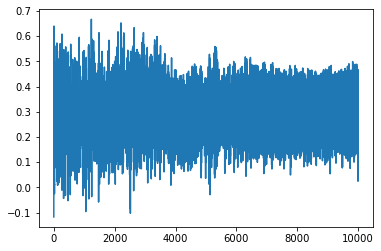

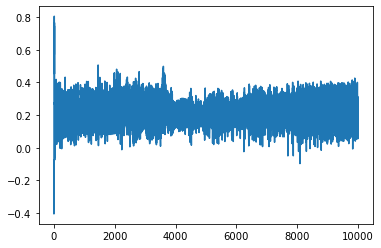

In [7]:
plt.plot(z)
plt.show()
plt.plot(z1)
plt.show()
plt.plot(z2)

In [8]:
print(np.mean(z))
print(np.mean(z1))
print(np.mean(z2))

0.49725951414480807
0.2895713844974525
0.21117142715901135


In [9]:
Z = z[2000:num_epoch]
Z1 = z1[2000:num_epoch]
Z2 = z2[2000:num_epoch]
len(Z)

8000

In [ ]:
#index = []; index1= []; index2 = []
#for i in range(len(Z)):
    if(Z[i]<0):
        index.append(i)
    if(Z1[i]<0):
        index1.append(i)
    if Z2[i]<0:
        index2.append(i)
#print(index2)
print("Length of index is",len(index))
print("Length of index1 is",len(index1))
print("Length of index2 is",len(index2))
#print(index2[1])


In [ ]:
#Z = np.delete(Z,index2)
#Z1 = np.delete(Z1,index2)
#Z2 = np.delete(Z2,index2)

In [10]:
for i in range(len(Z)):
    if(Z[i]<0):
        Z[i] = -1*Z[i]
    if(Z1[i]<0):
        Z1[i] = -1*Z1[i]
    if(Z2[i]<0):
        Z2[i] = -1*Z2[i]
    

In [11]:
print(np.mean(Z))
print(np.mean(Z1))
print(np.mean(Z2))

0.49651757086999715
0.2902750862422399
0.21159673865209333


In [12]:
from scipy.special import gamma
import statistics
samp = len(Z)

#s = np.random.dirichlet((10,6,3), samp).transpose() # drawing samples
#print(s.shape)# printing shape

## Three parameters are to be estimated, K1, K2 and K3
def dch(k1, k2, k3):
    S=0
    beta_k = gamma(k1)*gamma(k2)*gamma(k3)/(gamma(k1+k2+k3))
    for gene in range(samp):
        
        S = S + np.log(Z[gene]**(k1-1)*Z1[gene]**(k2-1)*Z2[gene]**(k3-1)/beta_k)
    return S
    
## RW-MH     
import random
import time
st = time.time()
num = 5000
K1 = np.zeros(num); K2 = np.zeros(num); K3 = np.zeros(num)

k1 = 2;k2 = 6; k3 = 4
acs = 0
for priork in range(num):
    
    Uk1 = .2
    
    t = np.random.uniform(k1 - Uk1,k1 + Uk1, 1) # sampling k1 from a proposal distribution. 
    if(t<0):
        prop_K1 = -t
    else:
        prop_K1 = t
        
        
        
    Uk2 = .2
    
    t2 = np.random.uniform(k2 - Uk2,k2 + Uk2, 1)# sampling k1 from a proposal distribution. 
    if(t2<0):
        prop_K2 = -t2
    else:
        prop_K2 = t2
        
        
    Uk3 = .2
    
    t3 = np.random.uniform(k3 - Uk3,k3 + Uk3, 1)# sampling k1 from a proposal distribution. 
    if(t3<0):
        prop_K3 = -t3
    else:
        prop_K3 = t3
        
    rp = dch(prop_K1, prop_K2, prop_K3)
    rc = dch(k1, k2, k3)
    kp1 = ((-1*prop_K1)) + ((-2*prop_K2)) +((-3*prop_K3))# prior distribution. I took the log of prior, the prior dist are
    # exp(-k1), exp(-k2), exp(-k3)
    
    kc1 = ((-1*k1)) + ((-2*k2)) + ((-3*k3))
        
    
    a1 = (kp1 + rp )-(kc1 + rc )
    
    if(np.log(np.random.uniform(0, 1 , 1)) < a1):
        
        k1 = prop_K1
        k2 = prop_K2
        k3 = prop_K3
        acs = acs + 1
    else:
        k1 = k1
        k2 = k2
        k3 = k3
        

    
  
        
    K1[priork] = k1
    K2[priork] = k2
    K3[priork] = k3
       


print(statistics.mode(K1))
print(statistics.mode(K2))
print(statistics.mode(K3))
et = time.time()  
print((et-st)/60)


8.818069107158342
5.064060345263146
3.8105695277852902
12.552349630991618


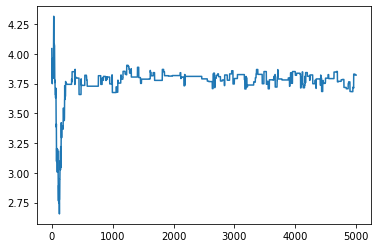

In [15]:
plt.plot(K3)

In [ ]:
print("mode is",statistics.mode(K1))

In [ ]:
len(Z2)